In [42]:
import joblib
from pathlib import PurePath
import pickle
import requests

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature
from sklearn.base import InconsistentVersionWarning
from sklearn.svm import LinearSVC

In [46]:
# url = 'https://tgpsaigon.net/Images/Articles/LargeImages/02122023_224315.jpeg'
url = 'https://tgpsaigon.net/Images/Articles/LargeImages/04022019_165533.jpg'

filename = PurePath(url).name

filename

'04022019_165533.jpg'

In [47]:
res = requests.get(url)
if res.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(res.content)

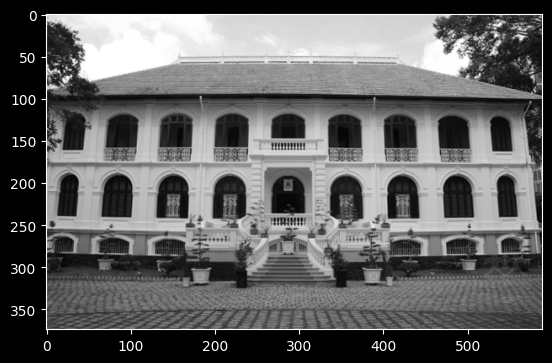

In [48]:
img = cv.imread(filename, 0)

plt.imshow(img, cmap='gray')
plt.show()

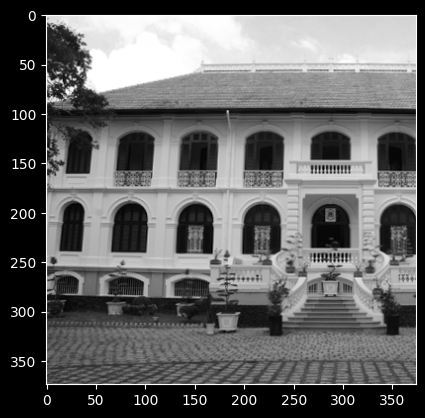

In [49]:
def crop_square(img_arg: np.ndarray) -> np.ndarray:
    height, width = img_arg.shape
    side = min(height, width)
    return img_arg[0:side, 0:side].copy()

cropped_img = crop_square(img)

plt.imshow(cropped_img, cmap='gray')
plt.show()

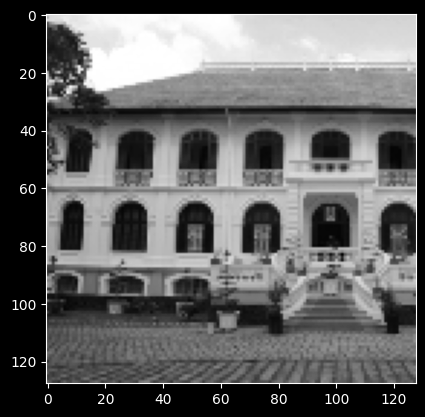

In [50]:
def resize_image(img_arg: np.ndarray) -> np.ndarray:
    return cv.resize(img_arg, (128, 128))

resized_cropped_img = resize_image(cropped_img)

plt.imshow(resized_cropped_img, cmap='gray')
plt.show()

In [51]:
def compute_hog(img_arg: np.ndarray) -> np.ndarray:
    return feature.hog(img_arg, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys',
                      visualize=False, transform_sqrt=True
    )

hog = compute_hog(resized_cropped_img)

print(hog.shape)
print(hog)

(8100,)
[0.06390085 0.02495393 0.11201671 ... 0.23390825 0.23390825 0.19236956]


In [52]:
try:
    model_1: LinearSVC = joblib.load('svm_model_hog.joblib')
except InconsistentVersionWarning:
    model_1 = None
    
# with open('canny_mnb_clf.pkl', 'rb') as f:
#     model_2 = pickle.load(f)

print(model_1.coef_)

[[-0.05344871 -0.38664183 -0.5153315  ... -0.10226166 -0.0876299
   0.12299346]]


c:\Users\C15TQK\anaconda3\envs\uit-cs431\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [53]:
pred_1 = model_1.predict([hog])[0]

# pred_2 = model_2.predict([hog])[0]

print(pred_1)

False
